In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm

In [2]:
dataset = "/Users/tannayak/Documents/projects-personal/football-analytics/EPL_player_data_2019_20.csv"

In [3]:
df = pd.read_csv(dataset)
df.keys()

Index(['First Name', 'Surname', 'Team', 'Pos', '£Start', '£End',
       'Total Points', 'Points Per Game', 'Transfers In', 'Transfers Out',
       'Season Value', 'Minutes', 'Goals', 'Assists', 'Clean Sheets',
       'Goals Conceded', 'Own Goals', 'Penalties Saved', 'Penalties Missed',
       'Yellow Cards', 'Red Cards', 'Saves', 'Bonus Points', 'BPS',
       'Influence', 'Creativity', 'Threat', 'ICT Index', 'Influence Rank',
       'Creativity Rank', 'Threat Rank', 'ICT Index Rank'],
      dtype='object')

In [4]:
df.columns = ["First_Name","Last_Name","Team","Position","Price_Start","Price_End","Total_Points_Scored","Points_Scored_Per_Game","Transfers_In","Transfers_Out","Season_Value","Minutes_Played","Goals_Scored","Assists","Clean_Sheets","Goals_Conceded","Own_Goals_Scored","Penalties_Saved","Penalties_Missed","Yellow_Cards","Red_Cards","Saves","Bonus_Points","BPS","Influence","Creativity","Threat","ICT_Index","Influence_Rank","Creativity_Rank","Threat_Rank","ICT_Index_Rank"]
df

,First_Name,Last_Name,Team,Position,Price_Start,Price_End,Total_Points_Scored,Points_Scored_Per_Game,Transfers_In,Transfers_Out,...,Bonus_Points,BPS,Influence,Creativity,Threat,ICT_Index,Influence_Rank,Creativity_Rank,Threat_Rank,ICT_Index_Rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kevin,De Bruyne,MCI,MID,9.5,10.6,251.0,7.2,6122288.0,4010477.0,...,35.0,988.0,1322.0,1991.0,1005.0,432.0,1.0,1.0,27.0,1.0
2,Tammy,Abraham,CHE,FWD,7.0,7.3,153.0,4.5,5791038.0,5254123.0,...,20.0,461.0,660.0,283.0,1301.0,223.0,58.0,150.0,10.0,28.0
3,Jamie,Vardy,LEI,FWD,9.0,9.7,210.0,6.0,5467849.0,4430099.0,...,34.0,775.0,1026.0,418.0,1455.0,289.0,5.0,94.0,8.0,9.0
4,Raúl,Jiménez,WOL,FWD,7.5,8.0,194.0,5.1,4677222.0,3995389.0,...,33.0,685.0,912.0,668.0,1680.0,325.0,15.0,27.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Joel,Mumbongo,BUR,FWD,4.5,4.5,0.0,0.0,57.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,624.0,614.0,601.0,626.0
663,Alexandre,Jankewitz,SOT,MID,4.5,4.5,0.0,0.0,45.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,630.0,619.0,608.0,632.0
664,John-Kymani,Gordon,CRY,MID,4.5,4.5,0.0,0.0,30.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,633.0,622.0,611.0,635.0
665,Jacob,Maddox,SOT,MID,4.5,4.5,0.0,0.0,22.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,603.0,593.0,579.0,605.0


In [5]:
df = df[["Position","First_Name","Last_Name","Price_Start","Price_End","Points_Scored_Per_Game","Total_Points_Scored","Season_Value","Minutes_Played","Goals_Scored","Assists","Clean_Sheets","Own_Goals_Scored","Penalties_Saved","Penalties_Missed","Yellow_Cards","Red_Cards","Bonus_Points","Influence","Creativity","Threat"]]
df = df.iloc[1:]
df

,Position,First_Name,Last_Name,Price_Start,Price_End,Points_Scored_Per_Game,Total_Points_Scored,Season_Value,Minutes_Played,Goals_Scored,...,Clean_Sheets,Own_Goals_Scored,Penalties_Saved,Penalties_Missed,Yellow_Cards,Red_Cards,Bonus_Points,Influence,Creativity,Threat
1,MID,Kevin,De Bruyne,9.5,10.6,7.2,251.0,23.7,2790.0,13.0,...,18.0,0.0,0.0,0.0,3.0,0.0,35.0,1322.0,1991.0,1005.0
2,FWD,Tammy,Abraham,7.0,7.3,4.5,153.0,21.0,2206.0,15.0,...,7.0,1.0,0.0,0.0,2.0,0.0,20.0,660.0,283.0,1301.0
3,FWD,Jamie,Vardy,9.0,9.7,6.0,210.0,21.6,3032.0,23.0,...,11.0,0.0,0.0,1.0,3.0,0.0,34.0,1026.0,418.0,1455.0
4,FWD,Raúl,Jiménez,7.5,8.0,5.1,194.0,24.2,3241.0,17.0,...,15.0,0.0,0.0,0.0,3.0,0.0,33.0,912.0,668.0,1680.0
5,FWD,Danny,Ings,6.0,7.6,5.2,198.0,26.1,2800.0,22.0,...,6.0,0.0,0.0,1.0,3.0,0.0,40.0,1010.0,458.0,1558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,FWD,Joel,Mumbongo,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,MID,Alexandre,Jankewitz,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,MID,John-Kymani,Gordon,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,MID,Jacob,Maddox,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(df.shape)

(666, 21)


In [7]:
df.isnull().values.any()

False

In [8]:
dataTypeDict = dict(df.dtypes)
print(dataTypeDict)

{'Position': dtype('O'), 'First_Name': dtype('O'), 'Last_Name': dtype('O'), 'Price_Start': dtype('float64'), 'Price_End': dtype('float64'), 'Points_Scored_Per_Game': dtype('float64'), 'Total_Points_Scored': dtype('float64'), 'Season_Value': dtype('float64'), 'Minutes_Played': dtype('float64'), 'Goals_Scored': dtype('float64'), 'Assists': dtype('float64'), 'Clean_Sheets': dtype('float64'), 'Own_Goals_Scored': dtype('float64'), 'Penalties_Saved': dtype('float64'), 'Penalties_Missed': dtype('float64'), 'Yellow_Cards': dtype('float64'), 'Red_Cards': dtype('float64'), 'Bonus_Points': dtype('float64'), 'Influence': dtype('float64'), 'Creativity': dtype('float64'), 'Threat': dtype('float64')}


In [9]:
print(df.describe())

       Price_Start   Price_End  Points_Scored_Per_Game  Total_Points_Scored  \
count   666.000000  666.000000              666.000000           666.000000   
mean      5.200450    5.036336                1.970571            46.564565   
std       1.178115    1.191524                1.487433            49.826582   
min       4.000000    3.800000                0.000000             0.000000   
25%       4.500000    4.300000                1.000000             1.000000   
50%       5.000000    4.700000                2.000000            33.000000   
75%       5.500000    5.300000                2.900000            76.750000   
max      12.500000   12.500000                8.400000           251.000000   

       Season_Value  Minutes_Played  Goals_Scored     Assists  Clean_Sheets  \
count    666.000000      666.000000    666.000000  666.000000    666.000000   
mean       8.502402     1124.833333      1.503003    1.352853      3.524024   
std        8.308484     1101.101809      3.270394  

In [10]:
print(df.groupby('Position').size()) # the output variable

Position
DEF    224
FWD     92
GKP     73
MID    277
dtype: int64


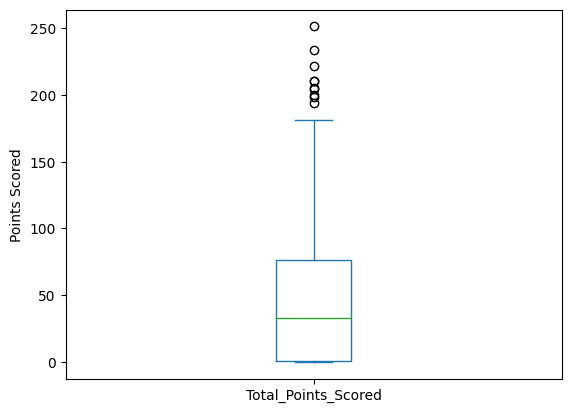

In [11]:
# Boxplot of Total_Points
df["Total_Points_Scored"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.ylabel("Points Scored")
plt.show()

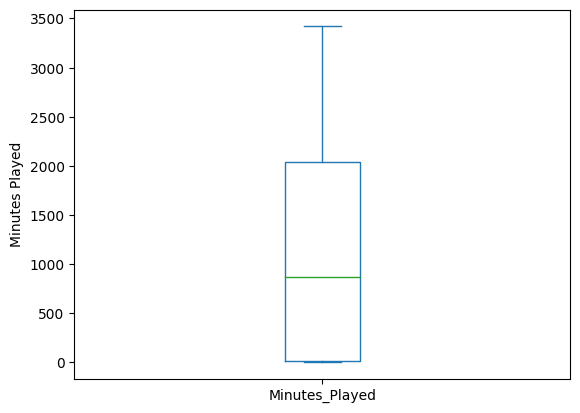

In [12]:
df["Minutes_Played"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.ylabel("Minutes Played")
plt.ylabel("Minutes Played")
plt.show()

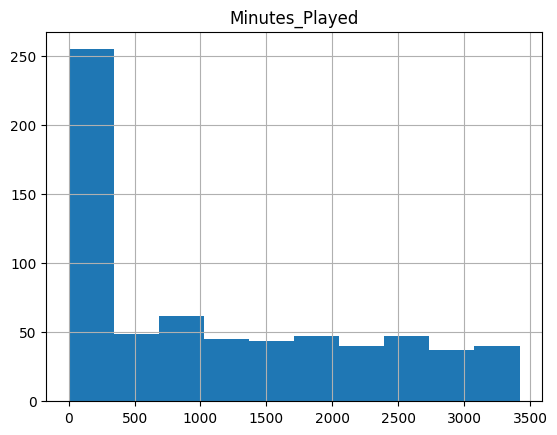

In [13]:
df[["Minutes_Played"]].hist()
plt.show()

In [14]:
df.sort_values('Minutes_Played', inplace=True, ascending=True) # sort on minutes
df
count = 0
for index, row in df.iterrows():
    if(row["Minutes_Played"] < 600):
        count += 1
        continue
    else:
        break
print(count)
df = df[285:]

285


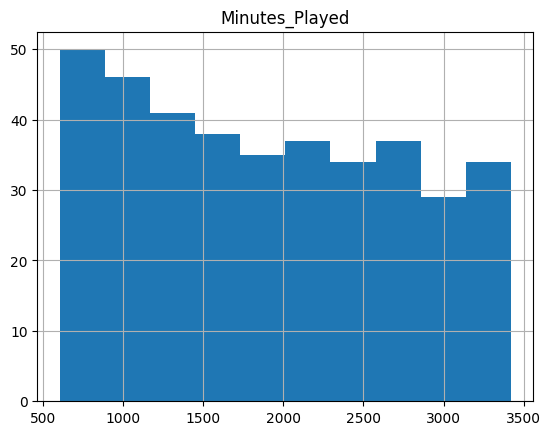

In [15]:
df[["Minutes_Played"]].hist()
plt.show()

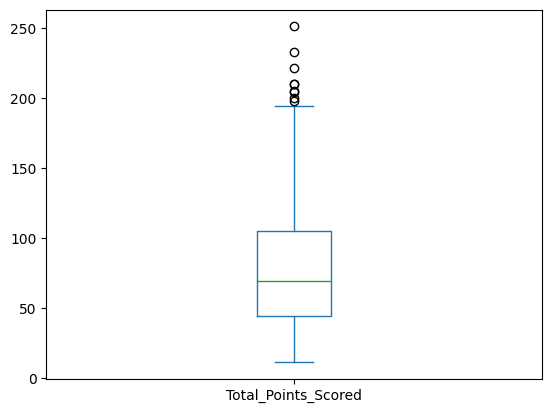

In [16]:
df["Total_Points_Scored"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.show()

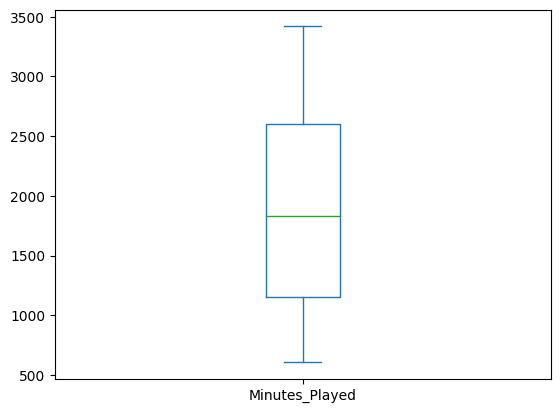

In [17]:
df["Minutes_Played"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.show()

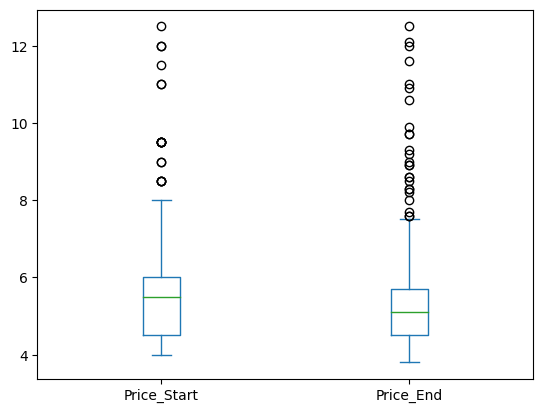

In [18]:
df[["Price_Start","Price_End"]].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.show()

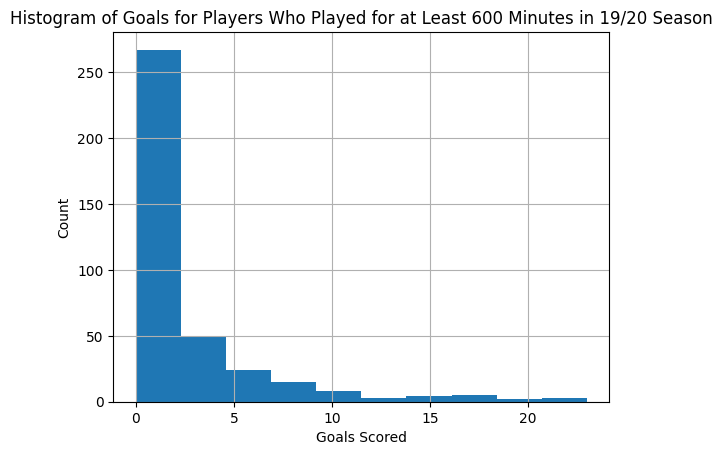

In [19]:
df["Goals_Scored"].hist()
plt.xlabel("Goals Scored")
plt.ylabel("Count")
plt.title("Histogram of Goals for Players Who Played for at Least 600 Minutes in 19/20 Season")
plt.show()

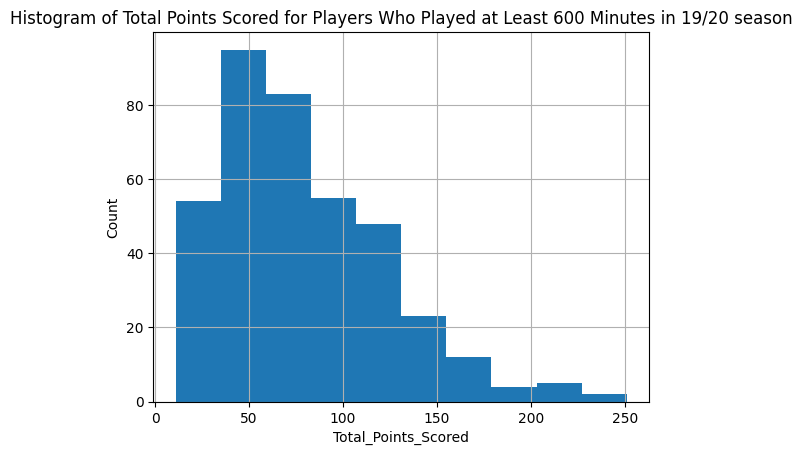

In [20]:
df["Total_Points_Scored"].hist()
plt.xlabel("Total_Points_Scored")
plt.ylabel("Count")
plt.title("Histogram of Total Points Scored for Players Who Played at Least 600 Minutes in 19/20 season")
plt.show()

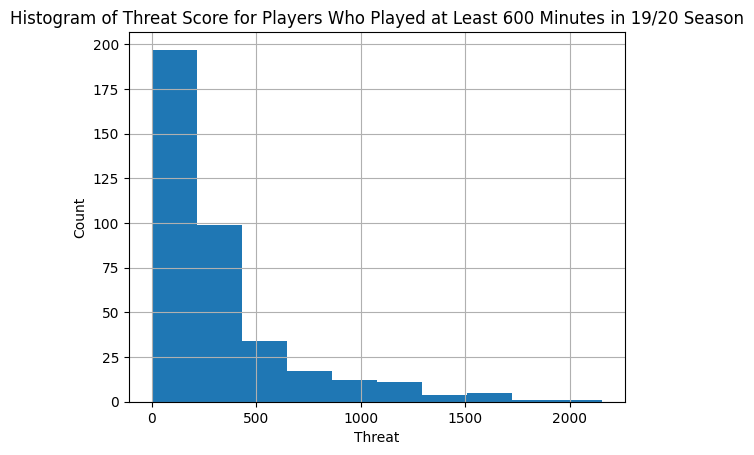

In [21]:
df["Threat"].hist()
plt.xlabel("Threat")
plt.ylabel("Count")
plt.title("Histogram of Threat Score for Players Who Played at Least 600 Minutes in 19/20 Season")
plt.show()

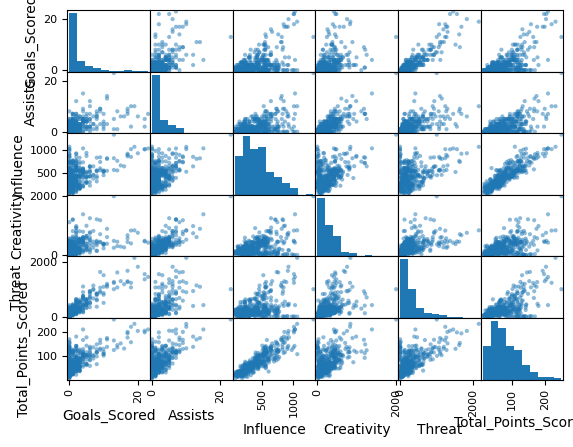

In [22]:
# quick scatter matrix view to see the relationship between variables
scatter_matrix(df[["Goals_Scored","Assists","Influence","Creativity","Threat","Total_Points_Scored"]])
plt.xticks(rotation = 90)
plt.show()

In [23]:
# split-out validation dataset (testing data)
array = df.values
X = array[:,4:] # row, columns of the features that I want
y = array[:,0] # output variable: player position
X_train,X_validation,Y_train,Y_validation = train_test_split(X,y,test_size = 0.2, random_state = 1) # random state means seed

In [24]:
# Algorithms
all_models = []
# liblinear has both L1 and L2 regularization
#     - Ridge Regression and Lasso Regression -> avoid overfitting and feature selection
# ovr means it's a binary problem for each label (one vs rest)
all_models.append(("LogReg",LogisticRegression(solver = "liblinear", multi_class="ovr")))

# maximizes seperation using our chosen features
#     - maximizing distance between means and minimizing variance 
#     - reduces features down 
#     - minimizes the scatter
all_models.append(("LDA",LinearDiscriminantAnalysis()))

# classification algorithm that memorizes observations to classify new data
#     - new data is classified by observing the "nearest neighbours"
all_models.append(("KNN", KNeighborsClassifier()))

# tree-like diagram where each leaf node is the outcome that is used to classify new data
all_models.append(("CART",DecisionTreeClassifier()))

# uses the Gaussian distribution to classify new data
all_models.append(("NB",GaussianNB()))

# uses a threshold that is the midpoint between different classifications
all_models.append(("SVM-g",SVC(gamma = "auto")))

# evaluate each model
results = []
names = []
# go through each model and perform cross validation to compare different machine learning algorithms
#     - kind of like foiling through the n_splits and training and testing for each algorithm
for name, model in all_models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_train,Y_train,cv=kfold, scoring = "accuracy") # evaluate score using cross validation
    results.append(cv_results)
    names.append(name)
    print("%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())) # take the mean and standard deviation

LogReg:0.839032(0.042243)
LDA:0.825591(0.049653)
KNN:0.674624(0.049608)
CART:0.707097(0.093672)
NB:0.619140(0.101877)
SVM-g:0.430968(0.009297)


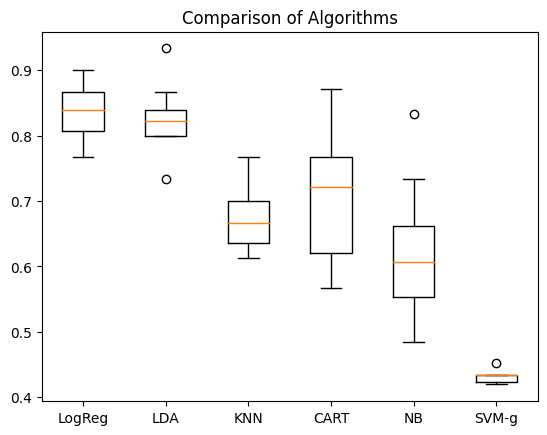

In [25]:
plt.boxplot(results,labels = names)
plt.title("Comparison of Algorithms")
plt.show()

In [26]:
model = LogisticRegression(solver = "liblinear", multi_class="ovr",random_state = 1) 
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)

In [27]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8441558441558441
[[27  0  0  5]
 [ 0  6  0  1]
 [ 0  0  6  0]
 [ 5  1  0 26]]
              precision    recall  f1-score   support

         DEF       0.84      0.84      0.84        32
         FWD       0.86      0.86      0.86         7
         GKP       1.00      1.00      1.00         6
         MID       0.81      0.81      0.81        32

    accuracy                           0.84        77
   macro avg       0.88      0.88      0.88        77
weighted avg       0.84      0.84      0.84        77



{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-9.03304526e-01  1.57940750e+00 -1.70810168e-02 -7.48790795e-02
  1.17872603e-03 -6.29484384e-01  2.44623550e-02 -1.46269091e-01
  2.38742407e-01 -3.09164602e+00  8.40535422e-02  1.23494159e-01
  7.43624857e-01  1.21973785e-01  8.04603328e-04 -1.31216445e-03
 -4.66008504e-05]
Index(['Price_End', 'Points_Scored_Per_Game', 'Total_Points_Scored',
       'Season_Value', 'Minutes_Played', 'Goals_Scored', 'Assists',
       'Clean_Sheets', 'Own_Goals_Scored', 'Penalties_Saved',
       'Penalties_Missed', 'Yellow_Cards', 'Red_Cards', 'Bonus_Points',
       'Influence', 'Creativity', 'Threat'],
      dtype='object')
Feature: 0, Score: -0.90330
Feature: 1, Score: 1.57941
Feature: 2, Score: -0.01708
Feature: 3, Score: -0.07

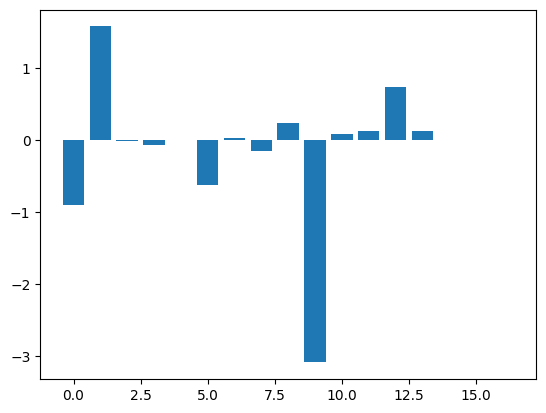

In [28]:
importance=model.coef_[0] # Coefficient of the features
print(model.get_params())
print(importance)
print(df.columns[4:])
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [29]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,Y_train)
predictions = lda.predict(X_validation)

In [30]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8441558441558441
[[28  0  1  3]
 [ 0  4  0  3]
 [ 0  0  6  0]
 [ 5  0  0 27]]
              precision    recall  f1-score   support

         DEF       0.85      0.88      0.86        32
         FWD       1.00      0.57      0.73         7
         GKP       0.86      1.00      0.92         6
         MID       0.82      0.84      0.83        32

    accuracy                           0.84        77
   macro avg       0.88      0.82      0.84        77
weighted avg       0.85      0.84      0.84        77



In [31]:
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_validation)

In [32]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.7012987012987013
[[20  0  0 12]
 [ 0  6  0  1]
 [ 0  0  6  0]
 [ 6  4  0 22]]
              precision    recall  f1-score   support

         DEF       0.77      0.62      0.69        32
         FWD       0.60      0.86      0.71         7
         GKP       1.00      1.00      1.00         6
         MID       0.63      0.69      0.66        32

    accuracy                           0.70        77
   macro avg       0.75      0.79      0.76        77
weighted avg       0.71      0.70      0.70        77



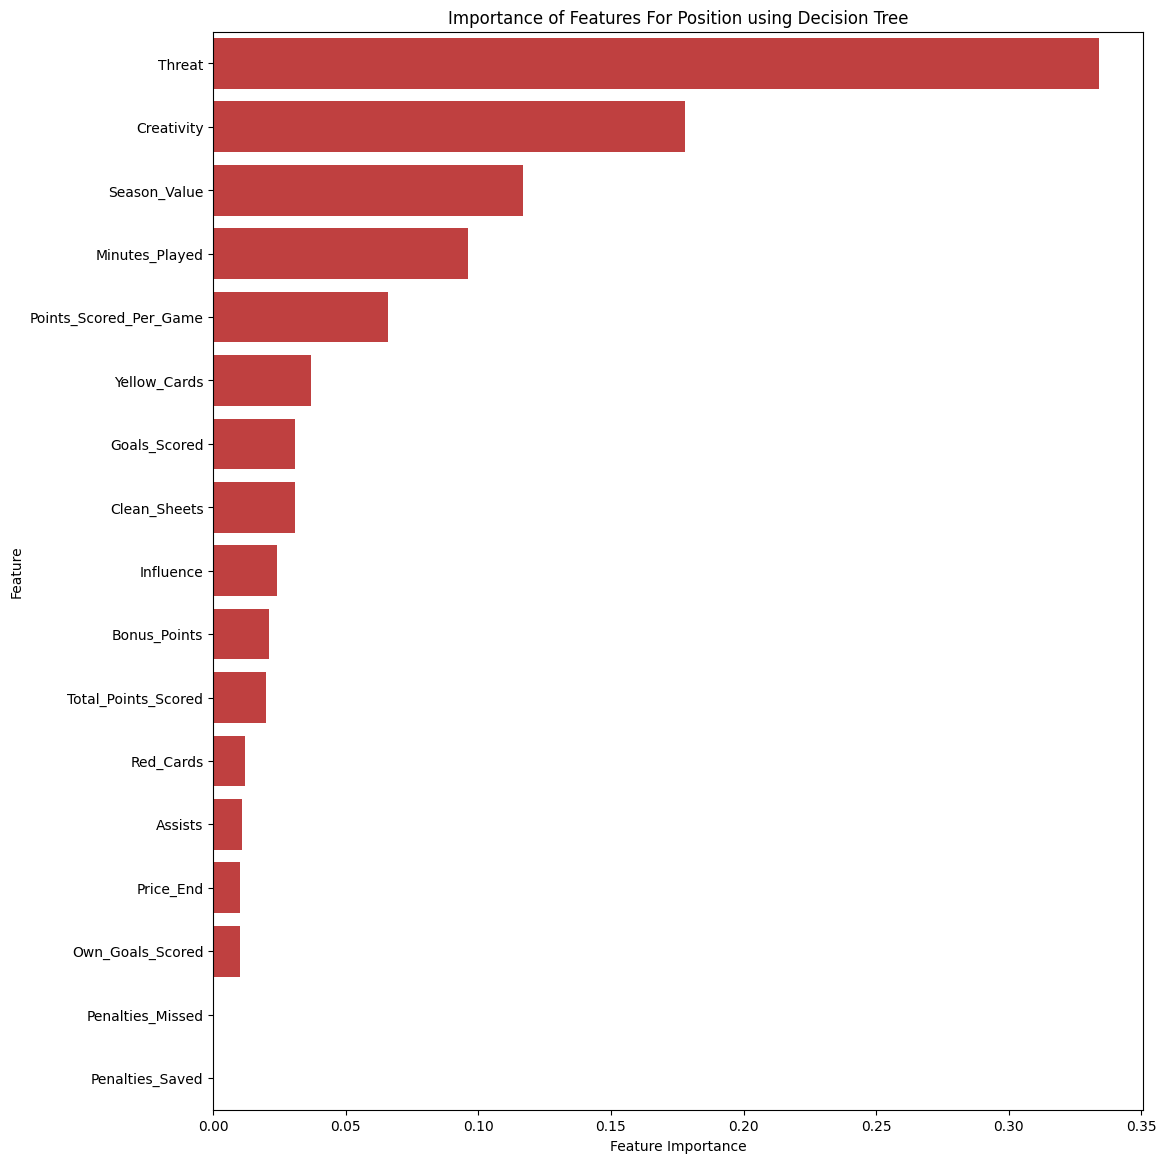

In [33]:
important_features = pd.DataFrame({'feature':df.columns[4:],'importance':np.round(clf.feature_importances_,3)})
important_features = important_features.sort_values('importance',ascending=False)
 
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='importance', y='feature', data=important_features,
                color="red", saturation=.5, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Importance of Features For Position using Decision Tree')
plt.show()

In [34]:
url_latest = 'https://fantasy.premierleague.com/api/bootstrap-static/'
req = requests.get(url_latest)
json = req.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [35]:
df_elements = pd.DataFrame(json['elements'])
df_elements_types = pd.DataFrame(json['element_types'])
df_teams = pd.DataFrame(json['teams'])

In [36]:
df_elements.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [37]:
pd.set_option('mode.chained_assignment', None) # ignore warning
df_latest = df_elements[["team","element_type","first_name","second_name","now_cost","points_per_game","total_points","value_season","minutes","goals_scored","assists","clean_sheets","own_goals","penalties_saved","penalties_missed","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_latest['position'] = df_latest.element_type.map(df_elements_types.set_index('id').singular_name) # position of player
df_latest['team'] = df_latest.team.map(df_teams.set_index('id').name) # team of player
df_latest['now_cost'] = df_latest['now_cost'].map(lambda x: x/10) # cost of player
df_latest['value'] = df_latest.apply(lambda row: round(row.total_points/row.now_cost,2), axis = 1) # total points/cost of player
def change_name(x):
    if(x == "Midfielder"):
        return "MID"
    elif(x == "Forward"):
        return "FWD"
    elif(x == "Goalkeeper"):
        return "GKP"
    else:
        return "DEF"
        
df_latest["position"] = [change_name(x) for x in df_latest["position"]]
df_latest

,team,element_type,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,...,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat,position,value
0,Arsenal,2,Cédric,Alves Soares,4.2,1.0,2,0.5,28,0,...,0,0,0,0,0,2.4,1.6,0.0,DEF,0.48
1,Arsenal,3,Granit,Xhaka,5.1,4.4,62,12.2,1166,3,...,0,0,2,0,7,291.8,278.5,228.0,MID,12.16
2,Arsenal,3,Mohamed,Elneny,4.2,1.3,4,1.0,94,0,...,0,0,0,0,0,4.2,5.3,0.0,MID,0.95
3,Arsenal,2,Rob,Holding,4.2,1.0,4,1.0,12,0,...,0,0,0,0,0,2.4,0.1,0.0,DEF,0.95
4,Arsenal,3,Thomas,Partey,4.8,3.8,42,8.8,959,2,...,0,0,1,0,4,221.0,141.3,111.0,MID,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Wolves,4,Diego,Da Silva Costa,5.5,1.2,7,1.3,412,0,...,0,0,0,1,0,9.2,30.2,294.0,FWD,1.27
663,Wolves,3,Boubacar,Traoré,4.5,1.5,12,2.7,380,0,...,0,0,2,0,0,48.0,16.6,7.0,MID,2.67
664,Wolves,4,Nathan,Fraser,4.5,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,FWD,0.00
665,Wolves,3,Harvey,Griffiths,4.5,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,MID,0.00


In [38]:
df_latest = df_latest[["position","first_name","second_name","now_cost","points_per_game","total_points","value_season","minutes","goals_scored","assists","clean_sheets","own_goals","penalties_saved","penalties_missed","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_latest

,position,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,assists,clean_sheets,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat
0,DEF,Cédric,Alves Soares,4.2,1.0,2,0.5,28,0,0,0,0,0,0,0,0,0,2.4,1.6,0.0
1,MID,Granit,Xhaka,5.1,4.4,62,12.2,1166,3,3,6,0,0,0,2,0,7,291.8,278.5,228.0
2,MID,Mohamed,Elneny,4.2,1.3,4,1.0,94,0,0,0,0,0,0,0,0,0,4.2,5.3,0.0
3,DEF,Rob,Holding,4.2,1.0,4,1.0,12,0,0,0,0,0,0,0,0,0,2.4,0.1,0.0
4,MID,Thomas,Partey,4.8,3.8,42,8.8,959,2,0,7,0,0,0,1,0,4,221.0,141.3,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,FWD,Diego,Da Silva Costa,5.5,1.2,7,1.3,412,0,0,1,0,0,0,0,1,0,9.2,30.2,294.0
663,MID,Boubacar,Traoré,4.5,1.5,12,2.7,380,0,1,0,0,0,0,2,0,0,48.0,16.6,7.0
664,FWD,Nathan,Fraser,4.5,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
665,MID,Harvey,Griffiths,4.5,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [39]:
df_latest.sort_values('minutes', inplace=True, ascending=True) # sort on minutes
df_latest = df_latest.reset_index(drop=True)
df_latest

,position,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,assists,clean_sheets,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat
0,GKP,Alex,Smithies,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,DEF,Haydon,Roberts,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,DEF,Sepp,van den Berg,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
3,DEF,Ben,Davies,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,DEF,Rhys,Williams,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,DEF,James,Tarkowski,4.4,2.7,41,9.3,1350,0,0,4,0,0,0,2,0,2,441.6,74.1,167.0
663,GKP,Gavin,Bazunu,4.5,2.3,34,7.6,1350,0,0,1,0,0,0,0,0,0,350.4,10.0,0.0
664,GKP,Hugo,Lloris,5.5,3.7,55,10.0,1350,0,0,4,0,0,0,0,0,7,325.8,0.0,0.0
665,GKP,Nick,Pope,5.3,4.7,70,13.2,1350,0,0,7,0,0,0,2,0,6,313.6,0.0,0.0


array([[<AxesSubplot: title={'center': 'minutes'}>]], dtype=object)

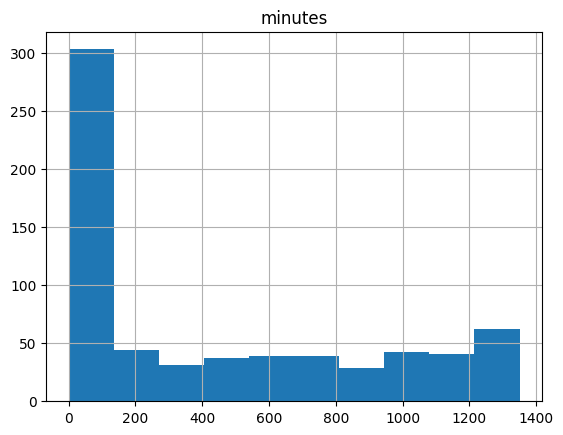

In [40]:
df_latest[["minutes"]].hist()

In [41]:
# remove players who have less than 300 minutes of playing time
count = 0
for index, row in df_latest.iterrows():
    if(row["minutes"] < 300):
        count += 1
        continue
    else:
        break
print(count)
df_latest = df_latest[302:]
df_latest = df_latest.reset_index(drop=True)

355


In [42]:
dataTypeDict = dict(df_latest.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'now_cost': dtype('float64'), 'points_per_game': dtype('O'), 'total_points': dtype('int64'), 'value_season': dtype('O'), 'minutes': dtype('int64'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'clean_sheets': dtype('int64'), 'own_goals': dtype('int64'), 'penalties_saved': dtype('int64'), 'penalties_missed': dtype('int64'), 'yellow_cards': dtype('int64'), 'red_cards': dtype('int64'), 'bonus': dtype('int64'), 'influence': dtype('O'), 'creativity': dtype('O'), 'threat': dtype('O')}


In [43]:
df_latest[["influence","creativity","threat"]] = df_latest[["influence","creativity","threat"]].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [44]:
df_latest
dataTypeDict = dict(df_latest.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'now_cost': dtype('float64'), 'points_per_game': dtype('O'), 'total_points': dtype('int64'), 'value_season': dtype('O'), 'minutes': dtype('int64'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'clean_sheets': dtype('int64'), 'own_goals': dtype('int64'), 'penalties_saved': dtype('int64'), 'penalties_missed': dtype('int64'), 'yellow_cards': dtype('int64'), 'red_cards': dtype('int64'), 'bonus': dtype('int64'), 'influence': dtype('float64'), 'creativity': dtype('float64'), 'threat': dtype('float64')}


Text(0, 0.5, 'count')

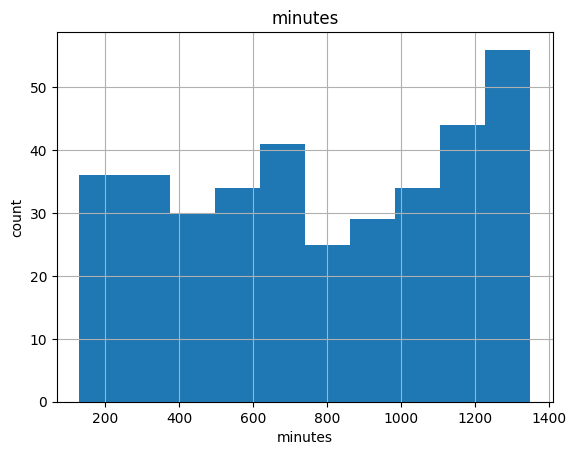

In [45]:
df_latest[["minutes"]].hist()
plt.xlabel("minutes")
plt.ylabel("count")

In [46]:
print(df_latest.shape) # 339 rows and 20 columns

(365, 20)


In [47]:
df_latest.isnull().values.any()

False

In [48]:
print(df_latest.describe())

         now_cost  total_points      minutes  goals_scored     assists  \
count  365.000000    365.000000   365.000000    365.000000  365.000000   
mean     5.348493     32.654795   775.934247      1.084932    0.961644   
std      1.353112     19.906409   374.468269      1.979543    1.356165   
min      3.900000      3.000000   131.000000      0.000000    0.000000   
25%      4.500000     18.000000   451.000000      0.000000    0.000000   
50%      4.900000     30.000000   750.000000      0.000000    0.000000   
75%      5.600000     44.000000  1133.000000      1.000000    1.000000   
max     12.800000    123.000000  1350.000000     18.000000   10.000000   

       clean_sheets   own_goals  penalties_saved  penalties_missed  \
count    365.000000  365.000000       365.000000        365.000000   
mean       2.473973    0.054795         0.019178          0.024658   
std        1.878890    0.227891         0.172774          0.172076   
min        0.000000    0.000000         0.000000     

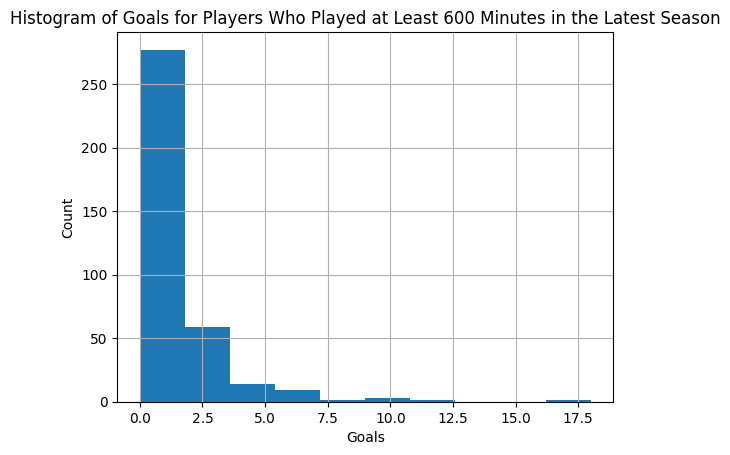

In [49]:
df_latest["goals_scored"].hist()
plt.xlabel("Goals")
plt.ylabel("Count")
plt.title("Histogram of Goals for Players Who Played at Least 600 Minutes in the Latest Season")
plt.show()

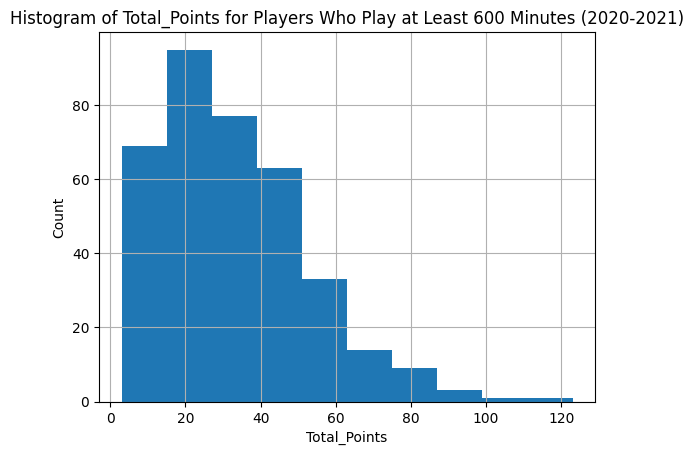

In [50]:
df_latest["total_points"].hist()
plt.xlabel("Total_Points")
plt.ylabel("Count")
plt.title("Histogram of Total_Points for Players Who Play at Least 600 Minutes (2020-2021)")
plt.show()

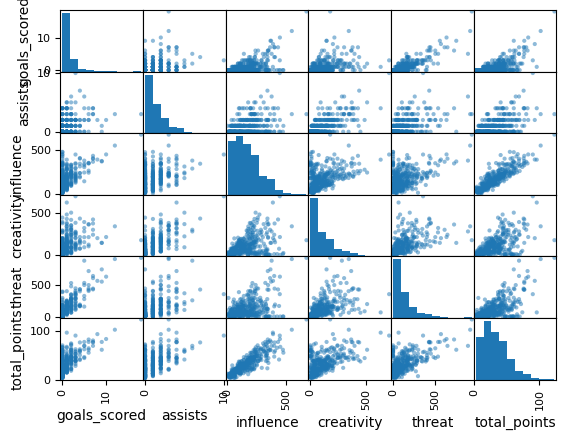

In [51]:
scatter_matrix(df_latest[["goals_scored","assists","influence","creativity","threat","total_points"]])
plt.xticks(rotation = 90)
plt.show()

In [52]:
array = df_latest.values
new_input_X = array[:,3:]
print(new_input_X)
true = array[:,0] # true position of the player
predictions = model.predict(new_input_X)
print(new_input_X)
print(new_input_X, predictions)

[[4.7 '1.0' 8 ... 18.4 12.2 14.0]
 [4.5 '0.8' 5 ... 19.8 5.3 31.0]
 [4.3 '1.8' 9 ... 33.8 12.8 2.0]
 ...
 [5.5 '3.7' 55 ... 325.8 0.0 0.0]
 [5.3 '4.7' 70 ... 313.6 0.0 0.0]
 [5.0 '4.1' 61 ... 356.4 0.0 0.0]]
[[4.7 '1.0' 8 ... 18.4 12.2 14.0]
 [4.5 '0.8' 5 ... 19.8 5.3 31.0]
 [4.3 '1.8' 9 ... 33.8 12.8 2.0]
 ...
 [5.5 '3.7' 55 ... 325.8 0.0 0.0]
 [5.3 '4.7' 70 ... 313.6 0.0 0.0]
 [5.0 '4.1' 61 ... 356.4 0.0 0.0]]
[[4.7 '1.0' 8 ... 18.4 12.2 14.0]
 [4.5 '0.8' 5 ... 19.8 5.3 31.0]
 [4.3 '1.8' 9 ... 33.8 12.8 2.0]
 ...
 [5.5 '3.7' 55 ... 325.8 0.0 0.0]
 [5.3 '4.7' 70 ... 313.6 0.0 0.0]
 [5.0 '4.1' 61 ... 356.4 0.0 0.0]] ['MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'DEF'
 'MID' 'DEF' 'MID' 'FWD' 'DEF' 'MID' 'DEF' 'FWD' 'MID' 'MID' 'MID' 'MID'
 'MID' 'MID' 'MID' 'MID' 'MID' 'FWD' 'MID' 'FWD' 'MID' 'DEF' 'MID' 'MID'
 'MID' 'DEF' 'MID' 'MID' 'MID' 'FWD' 'FWD' 'MID' 'MID' 'MID' 'MID' 'MID'
 'MID' 'FWD' 'MID' 'MID' 'MID' 'FWD' 'MID' 'MID' 'MID' 'DEF' 'FWD' 'MID'
 'MID' 'DEF

In [53]:
print(accuracy_score(true, predictions))
print(confusion_matrix(true, predictions))
print(classification_report(true, predictions))


0.7123287671232876
[[ 94   2   0  38]
 [  1  28   0  18]
 [  1   0  22   0]
 [ 33  12   0 116]]
              precision    recall  f1-score   support

         DEF       0.73      0.70      0.71       134
         FWD       0.67      0.60      0.63        47
         GKP       1.00      0.96      0.98        23
         MID       0.67      0.72      0.70       161

    accuracy                           0.71       365
   macro avg       0.77      0.74      0.75       365
weighted avg       0.71      0.71      0.71       365



In [54]:
df_latest["predicted"] = predictions
df_latest = df_latest[["predicted","position","first_name","second_name","now_cost","points_per_game","total_points","value_season","minutes","goals_scored","assists","clean_sheets","own_goals","penalties_saved","penalties_missed","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_latest = df_latest.sort_values('total_points', inplace=False, ascending=False)
df_latest.head(50)

,predicted,position,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,...,clean_sheets,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat
249,FWD,FWD,Erling,Haaland,12.2,9.5,123,10.1,1036,18,...,5,0,0,0,2,0,19,675.6,176.5,929.0
349,FWD,FWD,Harry,Kane,11.6,6.8,102,8.8,1336,12,...,5,0,0,1,4,0,21,550.4,342.6,910.0
347,DEF,DEF,Kieran,Trippier,5.9,6.4,96,16.3,1324,1,...,9,0,0,0,3,0,17,388.6,627.3,65.0
321,DEF,MID,Miguel,Almirón Rejala,5.8,6.2,93,16.0,1255,8,...,8,0,0,0,0,0,9,390.0,200.9,565.0
272,MID,MID,Kevin,De Bruyne,12.6,6.4,90,7.1,1130,3,...,5,0,0,0,0,0,13,447.6,702.7,354.0
331,FWD,FWD,Ivan,Toney,7.4,5.9,83,11.2,1260,10,...,4,0,0,0,5,0,14,448.6,214.3,631.0
309,MID,MID,Mohamed,Salah,12.8,5.9,82,6.4,1237,6,...,4,0,0,0,0,0,8,345.2,364.2,720.0
291,MID,MID,Leandro,Trossard,7.1,5.7,80,11.3,1175,7,...,4,0,0,0,1,0,5,364.6,301.1,608.0
294,MID,MID,Gabriel,Martinelli Silva,6.8,5.5,77,11.3,1183,5,...,7,0,0,0,1,0,6,324.0,322.8,532.0
261,DEF,MID,Martin,Ødegaard,6.4,5.9,77,12.0,1076,6,...,6,0,0,0,2,0,11,352.2,368.2,423.0
